<a href="https://colab.research.google.com/github/ViniciusSodre07/NLP/blob/main/scraping_music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. IMPORTANDO AS BIBLIOTECAS**

---

In [2]:
#IMPORTANDO AS BIBLIOTECAS
import requests
from bs4 import BeautifulSoup
import pandas as pd

# **2. DATASET MÚSICAS**

---

In [31]:
#Importando do site valume as músicas do artista Tim Maia

page = requests.get("https://www.vagalume.com.br/tim-maia/")
soup = BeautifulSoup(page.content, 'html.parser')
lista_alfabetica = BeautifulSoup(str(soup.findChildren(id = "alfabetMusicList")), 'html.parser')
a_tag = lista_alfabetica.findAll('a')

musicas = []
for a in a_tag:
    nome_musica = a.text
    if not(nome_musica == 'TRADUÇÃO' or nome_musica == ''):
        link_musica = a['href']
        musicas.append([nome_musica, link_musica])

for i in range(len(musicas)):
    link = "https://www.vagalume.com.br" + str(musicas[i][1])
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')
    h3_tag = soup.findAll('h3')
    if len(h3_tag) != 0:
        album = h3_tag[0].text
    else:
        album = ''
    lyrics = soup.findChildren(id = 'lyrics')
    lyrics = str(lyrics[0])
    lyrics = lyrics.replace('<div id="lyrics">', '')
    lyrics = lyrics.replace('<div data-plugin="googleTranslate" id="lyrics">', '')
    lyrics = lyrics.replace('<br/>', ' ')
    lyrics = lyrics.replace("\'","'")
    lyrics = lyrics.replace('</div>', '')
    musicas[i].append(album)
    musicas[i].append(lyrics)

musicas = pd.DataFrame(musicas, columns=['Nome da Música', 'link', 'album', 'letra'])
musicas.to_csv('musicas.csv', index=False)

In [32]:
# Ler o arquivo CSV 'musicas.csv'
musicas = pd.read_csv('musicas.csv')

# Exibir as primeiras 20 linhas do DataFrame #https://www.vagalume.com.br/tim-maia/amores.html
musicas.head(20)


,Nome da Música,link,album,letra
0,A Bela E A Fera,/tim-maia/a-bela-e-a-fera.html,NaN,"Ouve a declaração, ó bela De um sonhador titã ..."
1,A Festa,/tim-maia/a-festa.html,Nuvens,Beleza... Maravilha! Essa festa está maneira ...
2,A Festa de Santo Reis,/tim-maia/a-festa-de-santo-reis.html,Soul Tim - Duetos,Hoje é o dia do Santo Reis Anda meio esquecid...
3,A Fim de Voltar,/tim-maia/a-fim-de-voltar.html,Warner 25 Anos: Tim Maia,A fim de voltar Coro: Mas eu tenho um certo re...
4,A Grande Família Brasileira,/tim-maia/a-grande-familia-brasileira.html,Tim Maia,Nem que chova canivete Esse safo vai sair sába...
5,A Paz Do Meu Mundo É Você,/tim-maia/a-paz-do-meu-mundo-e-voce.html,Tim Maia,"Paz na terra, é sonho que não morre. Vem meu a..."
6,A Rã,/tim-maia/a-ra.html,Tim Maia: ao Vivo,Coro de cor Sombra de som de cor De mal-me-que...
7,Acenda O Farol,/tim-maia/acenda-o-farol.html,Soul Tim - Duetos,Pneu furou Acenda o farol (2x) Se alguém ligou...
8,Acredito,/tim-maia/acredito.html,Tim Maia,"Acredito no suor, ir à luta a todo vapor Acred..."
9,Além do Horizonte,/tim-maia/alem-do-horizonte.html,NaN,Além do horizonte deve ter Algum lugar bonito ...


In [33]:
# Obter e Concatenar o número de linhas com a string corretamente
print('Número de linhas: ' + str(musicas.shape[0]))

Número de linhas: 266


# **3. TRATANDO A BASE DE DADOS**

---



In [39]:
# Definir o padrão de código para músicas instrumentais (convertido para minúsculas)
instrumental_code = 'instrumental<img alt="instrumental" class="instrumental-icon" src="/img/etc/instrumental.png"/>'


# Filtrar e remover as linhas onde a coluna "letra" contenha o código de instrumental, ignorando maiúsculas e minúsculas
musicas_filtradas = musicas[~musicas['letra'].str.lower().str.contains(instrumental_code)]


# Salvar o DataFrame limpo em um novo arquivo CSV
musicas_filtradas.to_csv('musicas_filtradas.csv', index=False)


In [40]:
musicas_filtradas.head(20)

,Nome da Música,link,album,letra
0,A Bela E A Fera,/tim-maia/a-bela-e-a-fera.html,NaN,"Ouve a declaração, ó bela De um sonhador titã ..."
1,A Festa,/tim-maia/a-festa.html,Nuvens,Beleza... Maravilha! Essa festa está maneira ...
2,A Festa de Santo Reis,/tim-maia/a-festa-de-santo-reis.html,Soul Tim - Duetos,Hoje é o dia do Santo Reis Anda meio esquecid...
3,A Fim de Voltar,/tim-maia/a-fim-de-voltar.html,Warner 25 Anos: Tim Maia,A fim de voltar Coro: Mas eu tenho um certo re...
4,A Grande Família Brasileira,/tim-maia/a-grande-familia-brasileira.html,Tim Maia,Nem que chova canivete Esse safo vai sair sába...
5,A Paz Do Meu Mundo É Você,/tim-maia/a-paz-do-meu-mundo-e-voce.html,Tim Maia,"Paz na terra, é sonho que não morre. Vem meu a..."
6,A Rã,/tim-maia/a-ra.html,Tim Maia: ao Vivo,Coro de cor Sombra de som de cor De mal-me-que...
7,Acenda O Farol,/tim-maia/acenda-o-farol.html,Soul Tim - Duetos,Pneu furou Acenda o farol (2x) Se alguém ligou...
8,Acredito,/tim-maia/acredito.html,Tim Maia,"Acredito no suor, ir à luta a todo vapor Acred..."
9,Além do Horizonte,/tim-maia/alem-do-horizonte.html,NaN,Além do horizonte deve ter Algum lugar bonito ...


In [8]:
# Obter e Concatenar o número de linhas com a string corretamente
print('Número de linhas: ' + str(musicas_filtradas.shape[0]))

Número de linhas: 262


# **4. PROCESSAMENTO DE LINGUAGEM NATURAL**

---



Importando as bibliotecas

In [ ]:
#Instala a biblioteca Enelvo, que é utilizada para processar e analisar textos em português
!pip install enelvo

# Download do modelo em português - Spacy
!python -m spacy download pt_core_news_sm

In [12]:
# Importa a biblioteca spaCy, que é usada para processamento avançado de linguagem natural.
import spacy

# Importa a biblioteca NLTK (Natural Language Toolkit), que oferece ferramentas para o processamento de linguagem natural.
import nltk

# Importa a biblioteca string, que contém constantes úteis para manipulação de strings, incluindo pontuação.
import string

# Importa a função word_tokenize do NLTK para realizar a tokenização de texto, ou seja, dividir texto em palavras.
from nltk.tokenize import word_tokenize

# Importa a classe Normaliser da biblioteca Enelvo, que é usada para normalizar textos em português.
from enelvo.normaliser import Normaliser

# Importa a biblioteca pandas, que é usada para manipulação e análise de dados, especialmente para trabalhar com DataFrames.
import pandas as pd


In [ ]:
# Download dos complementos do NLTK
nltk.download('stopwords')
nltk.download('punkt')

In [20]:

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Função para o tratamento e limpeza

In [ ]:
from nltk.corpus import stopwords

nlp_spc = spacy.load('pt_core_news_sm')

#Limpando e tratando o texto
def limpar_texto(texto):
  #normalizar as palavras
  normalizar = Normaliser(tokenizer='readable')
  texto_normal = normalizar.normalise(texto)

  #Separar as palavras - Tokenização
  tokens = word_tokenize(texto_normal)

  #Removendo a pontuação
  tokens_sem_pontuacao = [p for p in tokens if p not in string.punctuation]

  #Remover stopwords e converter as palavras em minúsculo
  stops = stopwords.words('portuguese')
  tokens_sem_stopwords = [p.lower() for p in tokens_sem_pontuacao if p.lower() not in stops]

  #agrupando as palavras
  conjunto_token = " ".join(tokens_sem_stopwords)

  #Lemmatização - Extrair a palavra sem variação de gênero, tempo e número
  obj = nlp_spc(conjunto_token)
  tokens_lemma = [palavra.lemma_ for palavra in obj]

  return tokens_lemma

In [16]:
musicas_processadas = [limpar_texto(letra) for letra in musicas_filtradas["letra"]]

ERROR:enelvo.normaliser:Failed to normalise word "uuuhuuu"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!
ERROR:enelvo.normaliser:Failed to normalise word "disenchantment"!


In [ ]:
import string

# Agrupar todas as letras de músicas
tokens_agrupados = []
for musicas_filtradas in musicas_processadas:
    tokens_agrupados += musicas_filtradas

# Ordenar os tokens agrupados em ordem alfabética
tokens_agrupados_ordenados = sorted(tokens_agrupados, key=str.lower)

# Definir caracteres a serem removidos (aspas, vírgulas, acentos e pontuação)
caracteres_para_remover = "'\"´“”‘’" + string.punctuation  # Inclui pontuação geral

# Criar uma tabela de tradução para remover os caracteres indesejados
trans_table = str.maketrans('', '', caracteres_para_remover)

# Remover caracteres indesejados de cada token
tokens_agrupados_sem_caracteres = [token.translate(trans_table).strip() for token in tokens_agrupados_ordenados]

# Filtrar tokens vazios (se houver)
tokens_agrupados_sem_caracteres = [token for token in tokens_agrupados_sem_caracteres if token]

# Verificando os tokens agrupados em ordem alfabética, sem os caracteres indesejados
for token in tokens_agrupados_sem_caracteres:
    print(token)


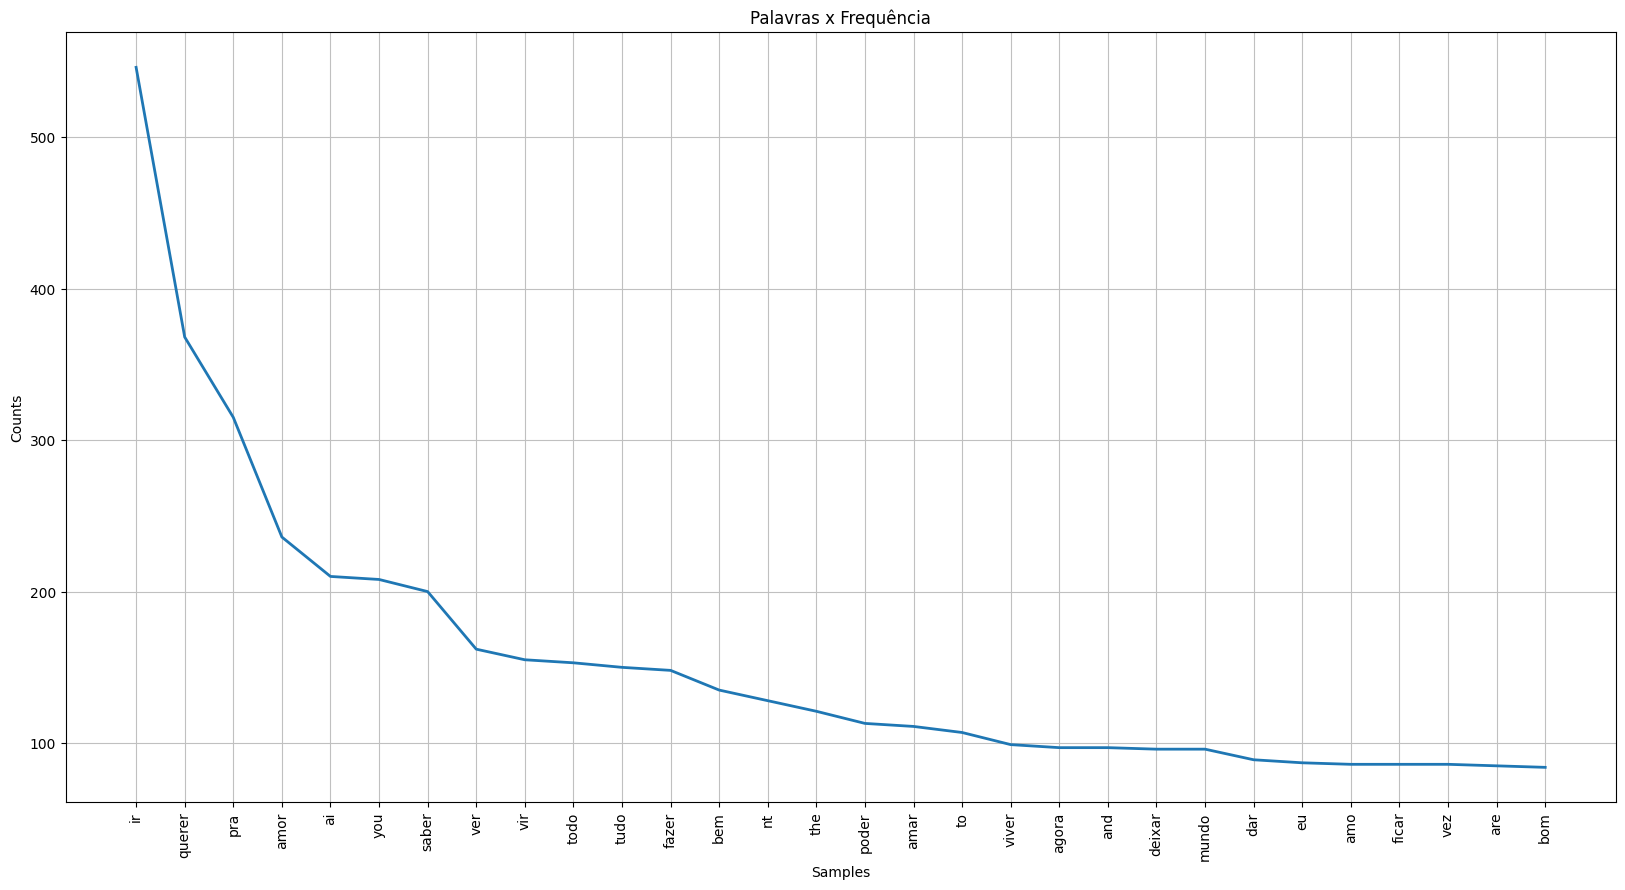

<Axes: title={'center': 'Palavras x Frequência'}, xlabel='Samples', ylabel='Counts'>

In [52]:
# Gerando um gráfico de frequência de palavras
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fd = nltk.FreqDist(tokens_agrupados_sem_caracteres)
fd.plot(30, title='Palavras x Frequência', cumulative=False)

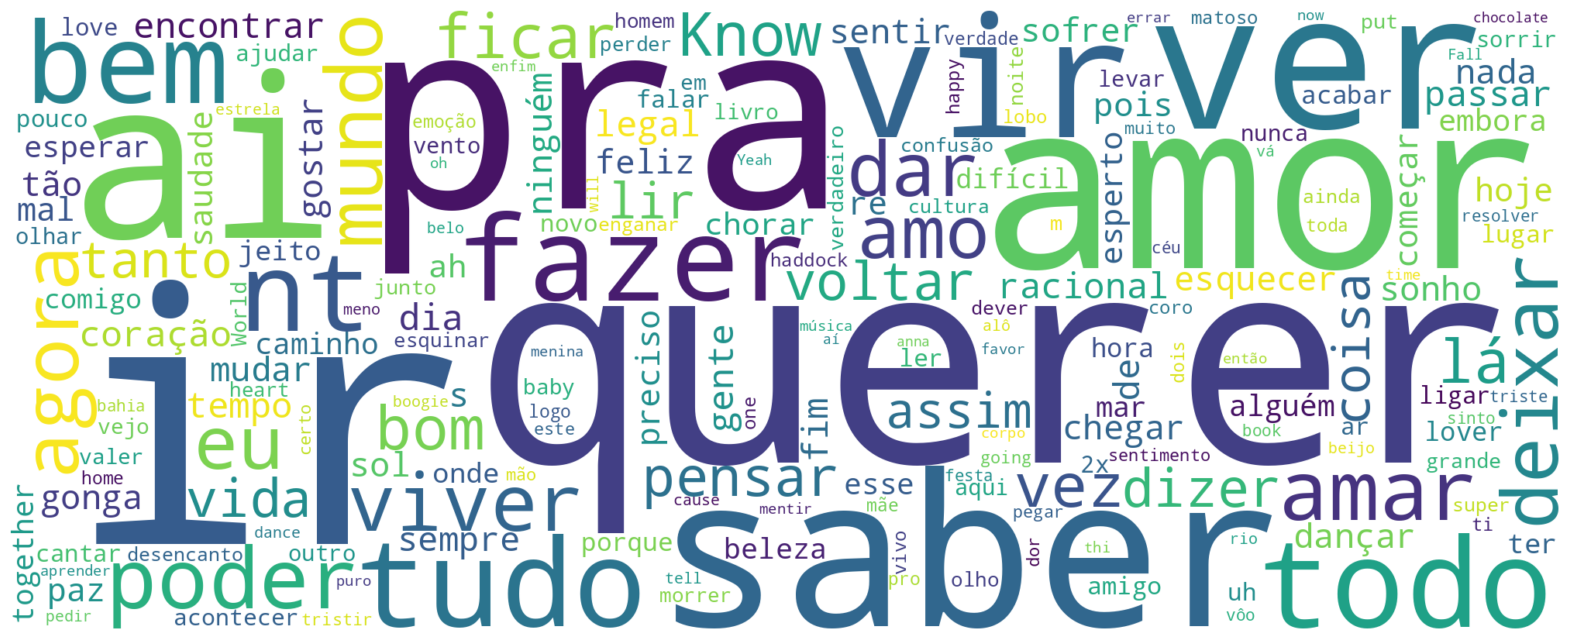

In [53]:
#Nuvem de palavras
from wordcloud import wordcloud

texto = " ".join(tokens_agrupados_sem_caracteres)
wordcloud = wordcloud.WordCloud(background_color="white", width=2000, height=800, collocations=False).generate(texto)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
fig.savefig("Tim_Maia.png", dpi=fig.dpi)
plt.show()